# Gathering Price Data

### User Data

In [1]:
#Enter your Key and secret
api_key =  "enter your API key"
api_secret = "enter your API secret"

In [2]:
#Enter the Login Details Below
from binance.client import Client
client = Client(api_key, api_secret)

###  Importing Packages and specifying the requirements

In [4]:
#Importing neccessary packages
import pandas as pd
from datetime import datetime
import datetime as datetime
import numpy as np
import time
import glob,os
import matplotlib.pyplot as plt

In [5]:
#List of Currencies
c = ["ETHUSDT","BTCUSDT","LTCUSDT","QSPBTC","CDTBTC","IOTABTC","NEOETH","POWRBTC","XRPBTC","XMRBTC"]
#Frequency at which data is retrieved (seconds)
t = 60

### Fuction that returns Last Traded Price

In [6]:
#Function that returns Latest Price
def get_price_of_currency(currency):
    try:
        return(pd.Series([currency,(client.get_symbol_ticker(symbol =currency))['price'], datetime.datetime.now()]))
    except:
        print "Check the Currency Symbol: " + str(currency)
        return(pd.Series([currency,'N/A', 'N/A']))

### Retrieving Price data for given coins

In [ ]:
# Updating new values to Data Frame
# Interrupt the Kernel when necessary amount of Data is collected
while 10>0: 
    df=pd.Series(c).apply(get_price_of_currency)
    df.columns=['currency','price','timestamp']
    df.to_csv('ticker_dump/ticker_prices'+str((str(datetime.datetime.now()).split('.')[0]).replace('-','').replace(':','').replace(' ',''))+'.csv',index=False,header=False)
    time.sleep(t)

### Concatenating all files in to a single CSV

In [89]:
Filelist = glob.glob('ticker_dump\*.csv')

In [90]:
list_of_dfs =  [pd.read_csv(filename, header = None) for filename in Filelist]

In [91]:
concatenated_df   = pd.concat(list_of_dfs, ignore_index=True)
concatenated_df.columns = ["Currency","Price","Time"]
concatenated_df.head()

,Currency,Price,Time
0,ETHUSDT,704.720000,2018-05-20 01:48:47.384
1,BTCUSDT,8256.000000,2018-05-20 01:48:47.598
2,LTCUSDT,134.990000,2018-05-20 01:48:47.811
3,QSPBTC,0.000028,2018-05-20 01:48:48.070
4,CDTBTC,0.000006,2018-05-20 01:48:48.279


### Exploring the retreived Data

In [92]:
df_eth = concatenated_df.loc[concatenated_df.Currency == "ETHUSDT",:]
df_eth = df_eth.dropna()

In [93]:
#Manupulating Time
df_eth['Time'] = pd.to_datetime(df_eth['Time'])

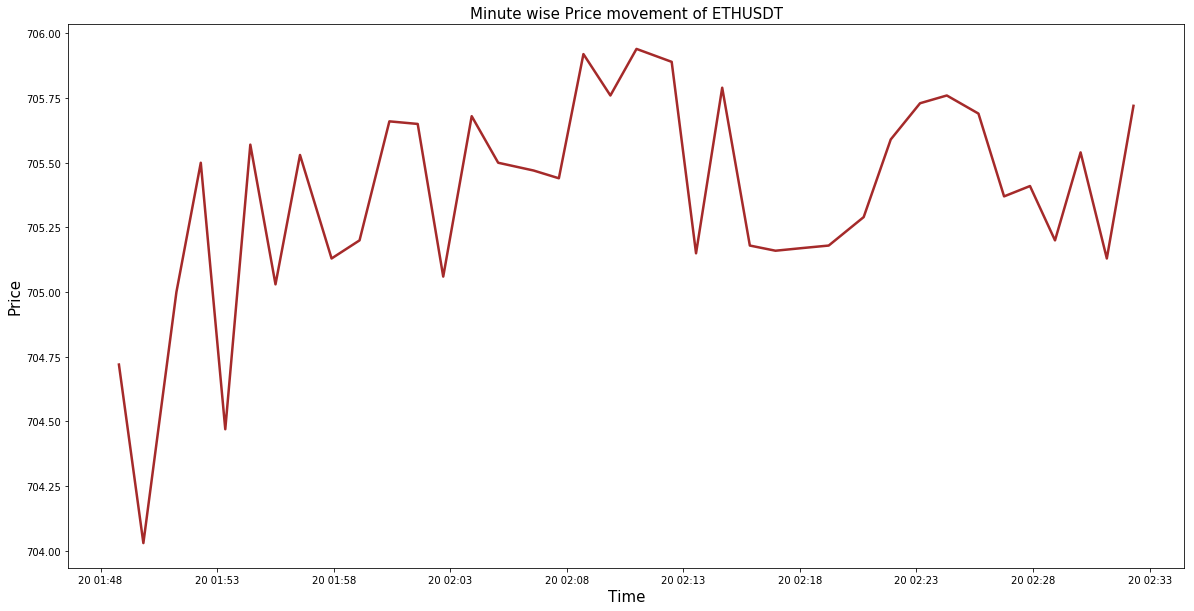

In [94]:
#Plotting Price Data
plt.figure(figsize=(20,10))
plt.plot(df_eth["Time"], df_eth["Price"], color= "brown", linewidth = 2.5)
plt.title("Minute wise Price movement of ETHUSDT", size = 15)
plt.ylabel("Price", size = 15)
plt.xlabel("Time", size = 15)
plt.show()